https://bit.ly/DSN-3-var

# Случайные события. Случайные величины

Пономарева Юлия:  
* [LinkedIn](https://www.linkedin.com/in/%D1%8E%D0%BB%D0%B8%D1%8F-%D0%BF%D0%BE%D0%BD%D0%BE%D0%BC%D0%B0%D1%80%D0%B5%D0%B2%D0%B0-4740761bb/)  
* [Мой YouTube канал по DS, ML, AI](https://www.youtube.com/c/machinelearrrning)

In [ ]:
import numpy as np

In [ ]:
# генерируем дискретную величину
np.random.randint(1, 5)

4

In [ ]:
np.random.randint(1, 5, 10)

array([1, 4, 3, 3, 2, 1, 2, 3, 2, 3])

In [ ]:
# генерируем непрерывную величину
np.random.random(10)

array([0.41890507, 0.12113742, 0.82646563, 0.35172445, 0.99724185,
       0.98678523, 0.43318064, 0.34045349, 0.56074073, 0.23119078])

In [ ]:
np.random.uniform(1, 5)

2.3958431123675634

In [ ]:
np.random.uniform(1, 5, 10)

array([4.56463592, 1.06116091, 2.17252035, 1.9945426 , 2.24863297,
       3.82351449, 4.24279082, 2.38508424, 4.24252557, 2.45915695])

In [ ]:
np.random.seed(None)
np.random.randint(1, 5, 5)

array([1, 2, 3, 4, 4])

## **Задача 1.**
 Оценить вероятность того, что на игральной кости выпадет больше 4 очков. Сравнить с теоретической вероятностью.

In [ ]:
trials = 10    # Количество попыток
successes = 0    # Количество успехов

for i in range(trials):
    random_score = np.random.randint(1, 7)    # Случайное количество очков от 1 до 6
    if random_score > 4:
        successes += 1
        
p_monte_carlo = successes / trials    # Вероятность из моделирования
p = 2 / 6                             # Теоретическая вероятность

print(successes, trials, p_monte_carlo, p)

2 10 0.2 0.3333333333333333


## **Задача 2.**
 Смоделировать стрельбу по мишени.

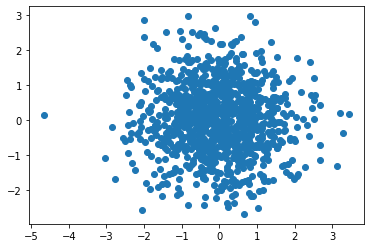

In [ ]:
import matplotlib.pyplot as plt

shots = 1000  # Количество выстрелов
std_dev = 1  # Стандартное отклонение (на сколько мы в среднем будем мазать)

x = np.random.normal(0, std_dev, shots) # 0 - и среднее, и мода, и медиана
y = np.random.normal(0, std_dev, shots)


plt.scatter(x, y);
# почему разброс от -3 до 3?

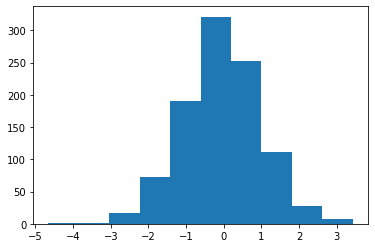

In [ ]:
plt.hist(x);

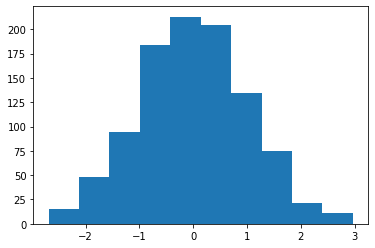

In [ ]:
plt.hist(y);

## **Задача 3.**
 Графически определить распределение измеренных значений физической величины, когда измерительный прибор имеет случайную погрешность.

In [ ]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/obulygin/netology_pyda_files/main/data.log", sep=" ")["az"]
data.describe()

count    1040.000000
mean       -9.797112
std         0.087958
min       -10.030373
25%        -9.866481
50%        -9.800747
75%        -9.727398
max        -9.570811
Name: az, dtype: float64

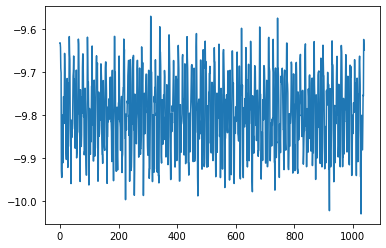

In [ ]:
data.plot();

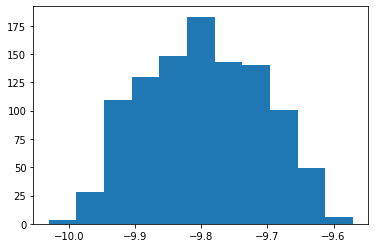

In [ ]:
plt.hist(data, bins=11)
plt.show()

In [ ]:
uni = np.random.uniform(data.min(), data.max(), 10000)
normal = np.random.normal(data.mean(), data.std(), 10000)

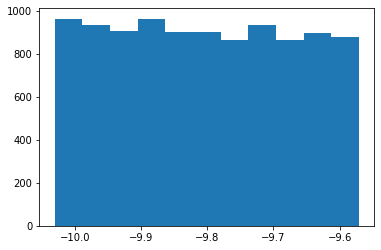

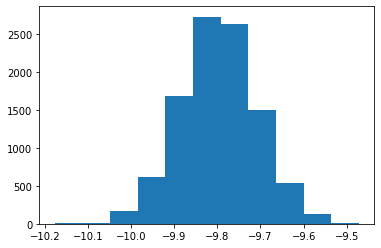

In [ ]:
plt.hist(uni, bins=11)
plt.show()
plt.hist(normal, bins=11)
plt.show()

## **Задача 4.**
 Рассчитать вероятность того, что пациент заражён COVID-19, если известно, что тест дал положительный результат. Сравнить с результатом моделирования.

In [ ]:
prev = 0.1    # Распространённость болезни
sens = 0.98   # Чувствительность теста
spec = 0.95   # Специфичность теста

p = (sens * prev) / (sens * prev + (1 - spec) * (1 - prev))   # Теоретическая вероятность 
print(p)

0.6853146853146851


In [ ]:
population = 1000000    # Количество испытуемых

true_pos = 0    # Количество больных с положительным тестом
false_pos = 0   # Количество здоровых с положительным тестом

for i in range(population):
    # Наугад решаем, заражён ли человек
    # для этого генерируем случайную величину от 0 до 1     
    infected = np.random.uniform() < prev
    
    # Наугад решаем, дал ли тест положительный результат 
    positive = np.random.uniform() < sens if infected else np.random.uniform() < 1 - spec
    
    if positive:
        if infected:
            true_pos += 1
        else:
            false_pos += 1
            
p_monte_carlo = true_pos / (true_pos + false_pos)    # частота из моделирования
p_monte_carlo

0.6866365559270919